In [22]:
import random
import networkx as nx


class Individual:
    def __init__(self, sets, graph):

        self.size = sum(len(s) for s in sets)
        self.graph = graph
        self.sorted_edges = sorted(self.graph.edges())
        self.gene = {i: (None, None) for i in self.sorted_edges}
        self._populate_individual(sets)

    def _populate_individual(self, sets):
        visited = {t: 0 for t in self.sorted_edges}

        for set in sets:
            random_set = list(set)
            random.shuffle(random_set)
            for cur_edge in set:
                value_assigned = False
                for other_edge in random_set:
                    if visited[other_edge] or other_edge == cur_edge:
                        continue
                    if self.adjacent(cur_edge, other_edge):
                        self.gene[cur_edge] = other_edge
                        visited[other_edge] = 1
                        value_assigned=True
                        break
                if not value_assigned:
                    for other_edge in random_set:
                        if not visited[other_edge]:
                            self.gene[cur_edge] = other_edge
                            visited[other_edge] = 1
                            break

    def adjacent(self, t1, t2):
        if t1[0] == t2[0] or t1[0] == t2[1] or t1[1] == t2[0] or t1[1] == t2[1]:
            return True
        return False

    def decode(self):
        labels = {l: 0 for l in self.sorted_edges}
        c = 1
        for locus, gene_value in self.gene.items():
            if labels[locus] == 0 and labels[gene_value] == 0:
                labels[locus] = c
                labels[gene_value] = c
                c += 1
            elif labels[locus] == 0:
                labels[locus] = labels[gene_value]
            elif labels[gene_value] == 0:
                labels[gene_value] = labels[locus]

        value_to_keys = {}
        for key, value in labels.items():
            if value in value_to_keys:
                value_to_keys[value].add(key)
            else:
                value_to_keys[value] = {key}
        return list(value_to_keys.values())

    def get_gene(self, index):
        return self.gene[self.sorted_edges[index]]

    def set_gene(self, index, gene_value):
        self.gene[self.sorted_edges[index]] = gene_value

    def get_loci(self,index):
        return self.sorted_edges[index]

    def __eq__(self, other):
        for i in range(len(self.gene)):
            if (self.gene[i] != other.gene[i] or self.sorted_edges[i] != other.loci[i]):
                return False
        return True

    def __str__(self):
        loci_str = ', '.join(map(str, self.gene.keys()))
        gene_str = ', '.join(map(str, self.gene.values()))

        return f"Loci: [{loci_str}]\nGene: [{gene_str}]"


graph = nx.read_edgelist('demo.txt', nodetype=int)
# Example usage:
sets_list = [{(1, 2), (2, 3)}, {(4, 5), (5, 6), (4, 11)}, {(7, 8), (8, 10)}]
individual = Individual(sets_list, graph)

print(individual)
print(individual.decode())


Loci: [(1, 2), (2, 3), (4, 5), (4, 11), (5, 6), (7, 8), (8, 10)]
Gene: [(2, 3), (1, 2), (4, 11), (4, 5), (5, 6), (8, 10), (7, 8)]
[{(2, 3), (1, 2)}, {(4, 11), (4, 5)}, {(5, 6)}, {(8, 10), (7, 8)}]


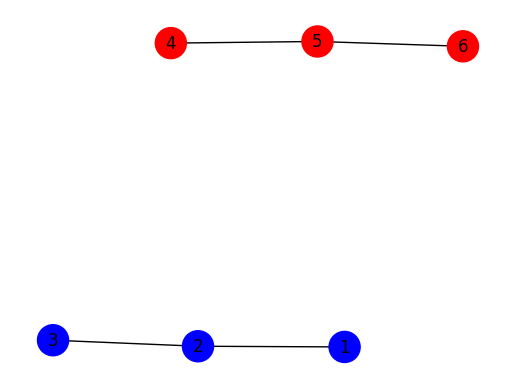

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes to subgraphs
subgraph1 = [1, 2, 3]
subgraph2 = [4, 5, 6]

G.add_nodes_from(subgraph1, subgraph='A')
G.add_nodes_from(subgraph2, subgraph='B')

# Add edges
edges = [(1, 2), (2, 3), (4, 5), (5, 6)]
G.add_edges_from(edges)

# Create a layout for the nodes
pos = nx.spring_layout(G)

# Create a mapping of subgraph to color
color_map = {'A': 'blue', 'B': 'red'}

# Get node colors based on subgraph attribute
node_colors = [color_map[G.nodes[n]['subgraph']] for n in G.nodes()]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Display the graph
plt.axis('off')
plt.show()
